In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
import numpy as np
from cleangym.carnot import CarnotEnv

# Carnot cycle environment test

This notebook tests the Carnot Cycle environment.

In [2]:
#First, initialise the environment
cyc = CarnotEnv(Ti=300., Vi=0.001, Tc=273.15, Th=273.15+200., dV=0.000001)

In [3]:
# Given the conditions specified above, compute the actions required to precisely hit the
# carnot efficiency
actions = cyc.get_perfect_carnot_action_set(2) #2 times through Carnot cycle.

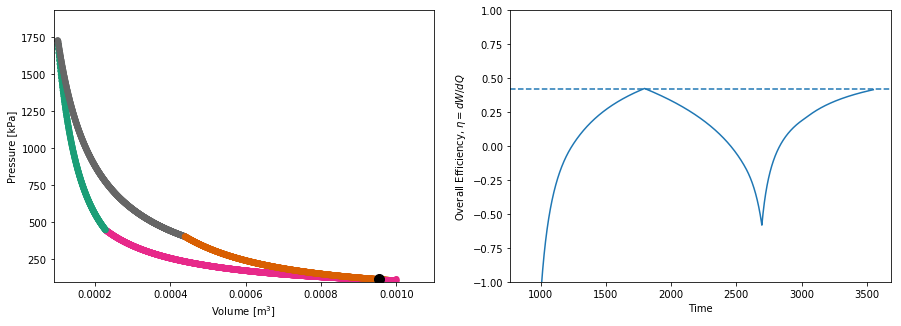

In [4]:
Ps = []
Vs = []
#Ss = []
Ts = []
As = []
etas = []
cyc.reset()

for i,action in enumerate(actions):
    
    Ps.append(cyc.engine.P)
    Vs.append(cyc.engine.V)
    Ts.append(cyc.engine.T)
    a = cyc.action_map[action]
    As.append(a)
    cyc.step(a)
    Q = np.array(cyc.Q).sum()
    W = np.array(cyc.W).sum()
    etas.append(W/Q)
    
    if i % 50==0:
        fig, ax = plt.subplots(1,2, figsize=(15,5))
        ax[0].scatter(Vs, Ps, s=30, c=As, cmap='Dark2')
        ax[0].scatter(Vs[-1], Ps[-1], s=100, c='k')
        ax[0].set_xlim(cyc.engine.Vmin*0.9, cyc.engine.Vmax*1.1)
        ax[0].set_ylim(cyc.engine.Pmin*0.9, cyc.engine.Pmax*1.1)
        ax[0].set_ylabel("Pressure [kPa]")
        ax[0].set_xlabel("Volume [m$^3$]")
        ax[1].set_xlabel("Time")
        ax[1].set_ylabel("Overall Efficiency, $\eta = dW/dQ$")
        ax[1].plot(etas)
        ax[1].set_ylim(-1,1)
        ax[1].axhline(y=1-(cyc.engine.Tc / cyc.engine.Th), ls='--')
        plt.show()
        plt.close()
        clear_output(wait=True)
        #Ps.append(cyc.engine.P)